# Loyal Health Data Science Coding Challenge

Instructions: The following questions are designed to assess your understanding of common data science concepts with which you should be familiar. We’ll have you complete some basic analysis over text reviews and their metadata from the popular music review site Pitchfork (https://pitchfork.com/). The data can be downloaded here (https://www.kaggle.com/nolanbconaway/pitchfork-data) in the form of a SQLite database.  We expect this to take around 2 hours (at most 3 hours) to complete. Although the completion of the assignment will not be strictly timed, please do not go over the allotted time. If time is an issue, focus the most on problems 2, 4, and 5. 

Write all of your code in this Jupyter notebook. When you’ve completed the assessment, please create a GitHub repository, and email us a link to this repository.


#### Loading the required packages and libraries

In [1]:
import sqlite3
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from functools import reduce
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob
from sklearn.preprocessing import StandardScaler
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf



#### Loading the sql tables from the sqlite database

In [2]:
con = sqlite3.connect("database.sqlite")
artists = pd.read_sql_query("SELECT * FROM artists",con)
content = pd.read_sql_query("SELECT * FROM content",con)
genres = pd.read_sql_query("SELECT * FROM genres",con)
labels = pd.read_sql_query("SELECT * FROM labels",con)
reviews = pd.read_sql_query("SELECT * FROM reviews",con)
years = pd.read_sql_query("SELECT * FROM years",con)

## 1. Cursory Data Analysis:

#### a) Compute the number of albums belonging to each genre. You should notice that some albums have multiple genres listed (e.g. Folk/Country,Pop/R&B,Rock) separated by commas. Consider albums with multiple genres as belonging to each of those genres (i.e. an album with Rap,Rock as it’s genres will be counted as one Rap album and one Rock album).

Rock music is by far the most reviewed genre on the site. Rock music has more than twice the amount of reviews as electronic music, which is the second most reviewed genre.

In [3]:
num_genre_albums = reviews.merge(genres, on='reviewid').groupby('genre')['title'].count()
num_genre_albums_pd = pd.DataFrame(num_genre_albums).reset_index()
num_genre_albums_pd.columns = ['Genre', 'Number of albums']
num_genre_albums_pd.set_index('Genre')

,Number of albums
Genre,
electronic,3874
experimental,1815
folk/country,685
global,219
jazz,435
metal,862
pop/r&b,1432
rap,1559
rock,9438


#### b) Compute the number of albums released each year.

Year 2007 has the most number of releases. And, there is a 400% increase in the number of releases in Year 1999.

In [4]:
num_albums_released = reviews.merge(years, on='reviewid').groupby('year')['title'].count()
num_albums_released_pd = pd.DataFrame(num_albums_released).reset_index()
num_albums_released_pd.columns = ['Released_year' , 'Number of albums']
num_albums_released_pd.set_index('Released_year')

,Number of albums
Released_year,
1959.0,1
1960.0,3
1962.0,3
1963.0,3
1964.0,5
1965.0,7
1966.0,8
1967.0,7
1968.0,16


#### c) Compute the ten artists with the highest number of albums reviewed in the data set.

Albums that cast various number of artists got the most number of reviews. Ther is a huge difference between the topmost category and the other artists reviewed albums.

In [5]:
num_albums_reviewed = pd.DataFrame(reviews[['reviewid','title']]).merge(artists, on='reviewid').groupby('artist')['title'].count()
num_albums_reviewed_pd = pd.DataFrame(num_albums_reviewed).reset_index().sort_values(['title'], ascending=False)
num_albums_reviewed_pd.columns = ['Artist', 'Number of albums reviewed']
num_albums_reviewed_pd = num_albums_reviewed_pd[:10]
num_albums_reviewed_pd.set_index('Artist')

,Number of albums reviewed
Artist,
various artists,690
guided by voices,23
neil young,23
bonnie prince billy,22
david bowie,21
the beatles,21
gucci mane,20
mogwai,20
of montreal,20


#### d) Compute the mean, median, standard deviation, minimum, and maximum album scores.

We can see that review scores follow a roughly normal distribution centered over a mean score of  7.006  with a standard deviation of  1.294 .

In [6]:
reviews['score'].describe()

count    18393.000000
mean         7.005779
std          1.293675
min          0.000000
25%          6.400000
50%          7.200000
75%          7.800000
max         10.000000
Name: score, dtype: float64

#### e) Compute the average score by each review author and return the result in a dataframe sort in descending order.

Few entries in the author column of the reviews table have multiple authors reviewing the album. So, the list of multiple authors need to be converted into individual rows to calculate the average score for each author.

In [7]:
reviews.shape

(18393, 13)

In [8]:
# convert authors and separated list into rows
reviews = reviews.assign(author=reviews.author.str.split("&")).explode('author')

In [9]:
mean_author_scores = reviews.groupby('author')['score'].mean()
mean_author_scores_pd = pd.DataFrame(mean_author_scores).reset_index().sort_values(['score'], ascending=False)
mean_author_scores_pd.columns = ['Author', 'Mean Score']
mean_author_scores_pd.set_index('Author')

,Mean Score
Author,
maura johnston,10.000000
nelson george,10.000000
carvell wallace,9.833333
dorian lynskey,9.500000
rollie pemberton,9.400000
...,...
stephen m. deusner,3.800000
bob o. mcmillan,3.500000
dr. andy beta,3.300000


##### f) Compute the average album score per artist and return the result in a dataframe with an additional column for the number of albums they’ve had reviewed.

Most of the Highest and the lowest average scores are coming from the artists that had reviewed few number of albums.

In [10]:
reviews_df = reviews[['reviewid', 'title', 'score']]
reviews_df = reviews_df.merge(artists, on='reviewid')
reviews_df = reviews_df.groupby(['artist']).agg({'title' : 'count', 'score' : 'mean'})
reviews_df.columns = ['n_albums', 'mean score']
reviews_df = reviews_df.sort_values(by='mean score', ascending=False)

#### i) Return the artists with the top 10 highest average scores

In [11]:
reviews_df[:10]

,n_albums,mean score
artist,,
slint,1,10.00
stevie wonder,1,10.00
talk talk,1,10.00
television,1,10.00
the stone roses,1,10.00
elvis costello & the attractions,2,9.75
dangelo,2,9.70
ultramagnetic mc's,1,9.70
n.w.a.,1,9.70


####  ii) Return the artists with the top 10 lowest average scores

In [12]:
reviews_df.tail(10)

,n_albums,mean score
artist,,
land of the el caminos,1,1.2
muggs,1,1.1
geoff farina,1,1.0
kra brekkan,1,1.0
toe,1,0.8
liars academy,1,0.6
shat,1,0.2
dan le sac vs. scroobius pip,1,0.2
push kings,1,0.1


## 2) SQL:

Merge the database tables into a dataframe containing all of the relevant metadata.


In [13]:
df_pitch = reduce(lambda x,y: pd.merge(x,y, on='reviewid', how='outer'), [artists,content,genres,labels, reviews, years])

In [14]:
df_pitch.shape

(27141, 18)

In [15]:
# df_pitch = df_pitch.drop('artist_y',axis=1)
df_pitch.rename({'artist_x':'artist'},axis=1, inplace=True)
df_pitch.columns

Index(['reviewid', 'artist', 'content', 'genre', 'label', 'title', 'artist_y',
       'url', 'score', 'best_new_music', 'author', 'author_type', 'pub_date',
       'pub_weekday', 'pub_day', 'pub_month', 'pub_year', 'year'],
      dtype='object')

## 3) Dataframe Manipulation (Using the Dataframe from part 2) create new DataFrames based on the stipulations below):


In [16]:
df_pitch.shape

(27141, 18)

#### a) Create a new DataFrame excluding all artists with names that start with the letter “M” (either upper or lowercase).

In [17]:
mask1 = ~df_pitch.artist.str.startswith(('m', 'M'))
df_a = df_pitch.loc[mask1]
df_a['artist'].nunique()
df_a.shape

(25088, 18)

#### b) Create a new DataFrame excluding albums with a score less than 4.0.

In [18]:
mask2 = df_pitch['score']<4.0
df_b = df_pitch.loc[mask2]
df_b.shape

(891, 18)

In [19]:
df_b['score'].unique()

array([3.5, 2. , 2.5, 3.8, 3. , 3.9, 3.2, 3.3, 2.4, 3.6, 1. , 3.1, 3.4,
       2.8, 2.9, 2.6, 1.8, 1.6, 2.2, 3.7, 2.1, 2.7, 1.5, 1.9, 2.3, 1.7,
       1.4, 0.2, 0.4, 1.3, 0. , 0.6, 0.5, 1.2, 0.9, 0.8, 1.1, 0.7, 0.1,
       0.3])

#### c) Create a new DataFrame excluding albums from the label Columbia

In [20]:
mask3 = df_pitch['label']!='columbia'
df_c = df_pitch.loc[mask3]
df_c.shape

(26881, 18)

In [21]:
df_c['label'].nunique()

3666

#### d) Create a new DataFrame excluding albums that belong to the metal genre.

In [22]:
mask4 = df_pitch['genre']!='metal'
df_d = df_pitch.loc[mask4]
df_d.shape

(26095, 18)

#### e) Create a new DataFrame excluding albums where that artist’s name contains an even number of characters (including whitespace as characters)

In [23]:
mask5 = df_pitch['artist'].str.len() %2 == 0
df_e = df_pitch.loc[mask5]
df_e.shape

(12616, 18)

#### f) Combine these DataFrames into one where each album meets the conditions required for each.

In [24]:
frames = [df_a,df_b,df_c,df_d,df_e]
df_f = pd.concat(frames)

In [25]:
mask6 = (mask1) & (mask2) & (mask3) & (mask4) & (mask5) 
df_f = df_pitch.loc[mask6]
df_f.shape

(336, 18)

In [26]:
df_f.head()

,reviewid,artist,content,genre,label,title,artist_y,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year
17,22720,yasiin bey,"In January 2016, rapper/actor Yasiin Bey annou...",rap,awge,december 99th,yasiin bey,http://pitchfork.com/reviews/albums/22720-dece...,3.5,0,marcus j. moore,contributor,2017-01-02,0,2,1,2017,2016.0
18,22720,yasiin bey,"In January 2016, rapper/actor Yasiin Bey annou...",rap,a country called earth,december 99th,yasiin bey,http://pitchfork.com/reviews/albums/22720-dece...,3.5,0,marcus j. moore,contributor,2017-01-02,0,2,1,2017,2016.0
237,22589,the chainsmokers,Bret Easton Ellis recently said if he were to ...,electronic,disruptor,collage,the chainsmokers,http://pitchfork.com/reviews/albums/22589-coll...,3.5,0,kevin lozano,tracks coordinator,2016-11-09,2,9,11,2016,2016.0
592,22319,prophets of rage,Picture yourself this past weekend at the Mohe...,rock,caroline,the party's over ep,prophets of rage,http://pitchfork.com/reviews/albums/22319-the-...,2.0,0,ian cohen,contributor,2016-08-31,2,31,8,2016,2016.0
593,22319,prophets of rage,Picture yourself this past weekend at the Mohe...,rap,caroline,the party's over ep,prophets of rage,http://pitchfork.com/reviews/albums/22319-the-...,2.0,0,ian cohen,contributor,2016-08-31,2,31,8,2016,2016.0


## 4) Feature Engineering:


#### a) Construct a Pandas DataFrame (see problem 2) containing all album reviews and metadata. Remove any rows that have null values in any column.

Most of the null values are present in the 'year' column

In [27]:
# Before dropping 'NA' rows
df_pitch.shape

(27141, 18)

In [28]:
df_pitch = df_pitch.dropna()

In [29]:
# After dropping 'NA' rows
df_pitch.shape

(18677, 18)

In [30]:
df_pitch.columns

Index(['reviewid', 'artist', 'content', 'genre', 'label', 'title', 'artist_y',
       'url', 'score', 'best_new_music', 'author', 'author_type', 'pub_date',
       'pub_weekday', 'pub_day', 'pub_month', 'pub_year', 'year'],
      dtype='object')

#### b) Add a column to the dataframe for each genre. The entry in this column should be a 1 if the album/row in question belongs to that genre and 0 otherwise. Remember that albums can belong to multiple genres.

In [31]:
enc = OneHotEncoder(handle_unknown='ignore')
# passing activity-types-cat column (label encoded values of genre)
enc_df = pd.DataFrame(enc.fit_transform(df_pitch[['genre']]).toarray())
enc_df.columns = enc.get_feature_names(['genre'])
train_df = enc_df

In [32]:
train_df.shape

(18677, 9)

#### c) Add an additional two columns with categorical variables for 1) the author of the review and 2) the role of the author.

LabelEncoder will assign the Labels to the author and author_type to transform the variables into Linear Algebraic Interpretation.

In [33]:
train_df = df_pitch[['author', 'author_type']].join(enc_df)

In [34]:
train_df.shape

(18677, 11)

In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
train_df['author'] = labelencoder.fit_transform(df_pitch['author'])
train_df['author_type'] = labelencoder.fit_transform(df_pitch['author_type'])

#### d) Create a column for the number of words in the review.

In [36]:
train_df['count'] = df_pitch['content'].str.split().str.len()

In [37]:
train_df.head()

,author,author_type,genre_electronic,genre_experimental,genre_folk/country,genre_global,genre_jazz,genre_metal,genre_pop/r&b,genre_rap,genre_rock,count
0,171,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1456
1,245,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,419
2,52,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,597
3,52,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,597
4,95,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1240


#### e) Create a column containing the sentiment score of the review. Treat the review as a single string and take the TextBlob polarity score (https://textblob.readthedocs.io/en/dev/quickstart.html).

In [38]:
def sentiment_calc(text):
    return TextBlob(text).sentiment.polarity
    
train_df['sentiment'] = df_pitch['content'].apply(sentiment_calc)

In [39]:
train_df.head()

,author,author_type,genre_electronic,genre_experimental,genre_folk/country,genre_global,genre_jazz,genre_metal,genre_pop/r&b,genre_rap,genre_rock,count,sentiment
0,171,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1456,0.097281
1,245,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,419,0.041640
2,52,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,597,0.123304
3,52,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,597,0.123304
4,95,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1240,0.161576


## 5) Logistic Regression: 

You will now use the features you constructed in the previous exercise to complete a binary logistic regression task accounting for whether an album reviews Pitchfork’s designation of “Best New Music.” This is represented by the binary “bnm” variable in the dataset. 


#### a) Scale all non-categorical variables as needed.

We have two non-categorical variables i.e. count and sentiment. These two variables are nominal variables and should be standardized to use in the logistic regression models. standardization (or Z-score normalization) means centering the variable at zero and standardizing the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation

In [40]:
scaler = StandardScaler() 

In [41]:
data = train_df.iloc[:,-2:]

In [42]:
data = scaler.fit_transform(data.values)

In [43]:
train_df[['count','sentiment']] = pd.DataFrame(data)

In [44]:
train_df.head()

,author,author_type,genre_electronic,genre_experimental,genre_folk/country,genre_global,genre_jazz,genre_metal,genre_pop/r&b,genre_rap,genre_rock,count,sentiment
0,171,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.080366,-0.423479
1,245,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.018138,-1.408675
2,52,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.314634,0.037290
3,52,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.314634,0.037290
4,95,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.226676,0.714940


#### b) Perform your logistic regression model using the statsmodel library (https://www.pythonfordatascience.org/logistic-regression-python/ ). Treat the best new music variable as your dependent variable and use the release year, word count, sentiment, all genre binary variables, author, and author role as your independent variables

In [45]:
train_df[['bnm','year']] = df_pitch[['best_new_music', 'pub_year']]

In [46]:
train_df.head()

,author,author_type,genre_electronic,genre_experimental,genre_folk/country,genre_global,genre_jazz,genre_metal,genre_pop/r&b,genre_rap,genre_rock,count,sentiment,bnm,year
0,171,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.080366,-0.423479,0,2017
1,245,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.018138,-1.408675,0,2017
2,52,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.314634,0.037290,0,2017
3,52,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.314634,0.037290,0,2017
4,95,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.226676,0.714940,1,2017


In [47]:
model = smf.logit('''bnm ~ count+ sentiment + year + Q("genre_electronic") +
                  Q("genre_experimental") + Q("genre_folk/country") + Q("genre_global") +
                  Q("genre_jazz") + Q("genre_metal") + Q("genre_pop/r&b") + Q("genre_rap") + Q("genre_rock")
                  + Q("author_type") + author ''', data = train_df)

In [48]:
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.286205
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bnm   No. Observations:                14415
Model:                          Logit   Df Residuals:                    14401
Method:                           MLE   Df Model:                           13
Date:                Sat, 02 Oct 2021   Pseudo R-squ.:                 0.02343
Time:                        23:36:47   Log-Likelihood:                -4125.6
converged:                       True   LL-Null:                       -4224.6
Covariance Type:            nonrobust   LLR p-value:                 3.578e-35
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -178.2366        nan        nan        nan         nan         nan
count                       0.0168      0.028      0.596      0.551      -0.039       0.072
sentiment                   0.0448      0.031      1.463      0.144      -0.015       0.105
year                        0.0967      0.010      9.512      0.000       0.077       0.117
Q("genre_electronic")     -19.7988        nan        nan        nan         nan         nan
Q("genre_experimental")   -19.6846        nan        nan        nan         nan         nan
Q("genre_folk/country")   -19.6769        nan        nan        nan         nan         nan
Q("genre_global")         -19.8159        nan        nan        nan         nan         nan
Q("genre_jazz")           -19.8144        nan        nan        nan         nan         nan
Q("genre_metal")          -19.9569        nan        nan        nan         nan         nan
Q("genre_pop/r&b")        -19.8411        nan        nan        nan         nan         nan
Q("genre_rap")            -19.8919        nan        nan        nan         nan         nan
Q("genre_rock")           -19.7560        nan        nan        nan         nan         nan
Q("author_type")            0.1393      0.013     10.974      0.000       0.114       0.164
author                      0.0013      0.000      3.009      0.003       0.000       0.002
===========================================================================================
"""

#### c) Calculate the odds ratios for your independent variables

In [49]:
import numpy as np
coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'name': results.params.index
})
coefs

,coef,odds ratio,name
0,-178.236588,3.915918e-78,Intercept
1,0.016845,1.016988e+00,count
2,0.044799,1.045818e+00,sentiment
3,0.096706,1.101536e+00,year
4,-19.798843,2.520412e-09,"Q(""genre_electronic"")"
5,-19.684559,2.825560e-09,"Q(""genre_experimental"")"
6,-19.676926,2.847211e-09,"Q(""genre_folk/country"")"
7,-19.815881,2.477835e-09,"Q(""genre_global"")"
8,-19.814424,2.481447e-09,"Q(""genre_jazz"")"
9,-19.956932,2.151862e-09,"Q(""genre_metal"")"


#### d) What features are most/least predictive of a best new music designation and why do you think that is?

#### Observations and results-:

 1. Odds ratio-: Coefficients for sentiment, year, author_type, and author variables are +ve i.e. these variables will increase the odds of the best new music while the coeffcients for binary genre variables are negative and penalizing the odds of best new music. 

 2. Statistical Significance:-Typically a p value of 0.05 (or 5%) is thought of as "good" or "statistically significant," as there's only a 5% or less chance that these results aren't valid. Our p-value for overall regression is less than 0.05 which means results are very much valid.

  3. Feature Importance-: Beyond p values for the entire regression, we can also find p-values for each individual feature. They're listed under P>|z|. Notice that p-values for 'author' and 'author_type'and 'year' are the best and the most predictive feature for the response variable while genre binary variables are the least predictive as they have the p-values greater than 0.05.

##### e) If you were to engineer an additional feature for the regression, what would it be? Describe how you would approach constructing that feature.

- Rudimentary Analysis shows 'authors' and 'authors role' plays an important role in predicitng the likelihood of best new music. Similarly, it would be interesting to see whether an artist is essential to the success of best new music or not. Recursive Feature Elimination technique can be used to see whether this new feature revamp the model quality or not. If the new feature improves the model then pseudo R-square will increase.

- Other time related feature that can be explored is the releasing month. As we have seen that year plays an essential part in predicting the best new music, therefore further granularity at the month level may assist the model quality. Feature can be constructed by denoting each month of the year by a number and would be cond=sidered as categorical feature.

## 6) Data Visualization (Optional): 

Using the results from your regression and data analysis create a visualization that tells a story about the data. Feel free to take personal liberties with this and be as creative as you like. 

### How are review scores distributed?

In [50]:
import matplotlib.pyplot as pl
# Special colour for graphs
p4k_red = '#ff3530'

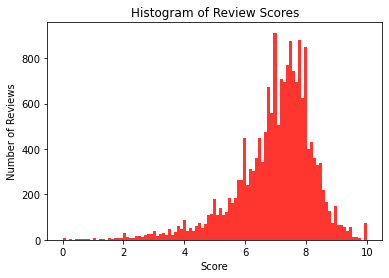

In [51]:
pl.hist(reviews['score'], bins=101, color=p4k_red)
pl.title('Histogram of Review Scores')
pl.xlabel('Score')
pl.ylabel('Number of Reviews');

## Genres
### What's the most reviewed genre?

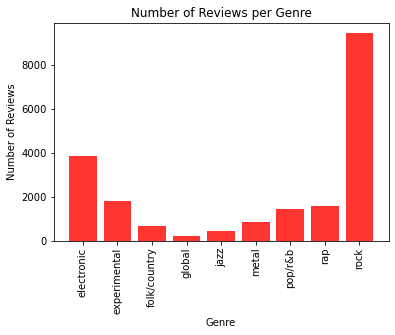

In [52]:
pl.bar(x=num_genre_albums.index, height=num_genre_albums, color=p4k_red)
pl.xticks(rotation=90)
pl.title('Number of Reviews per Genre')
pl.xlabel('Genre')
pl.ylabel('Number of Reviews');

## What's the highest rated genre?

All of the genres tend to have an average score between about  6.5  and  7.5 . Although global music has the highest rating, it is also the least reviewed genre, so individual scores have a higher influence on the genre mean than in other genres.Between the top 3 most reviewed genres (rock, electronic, experimental), there is sufficient evidence at a  0.05  significance level that their mean scores differ.

In [53]:
mean_genre_scores = reviews.merge(genres, on='reviewid').groupby('genre')['score'].mean()
mean_genre_scores_pd = pd.DataFrame(mean_genre_scores).reset_index()
mean_genre_scores_pd.columns = ['Genre', 'Mean Score']
mean_genre_scores_pd.set_index('Genre')

,Mean Score
Genre,
electronic,6.921589
experimental,7.333462
folk/country,7.202332
global,7.429680
jazz,7.303908
metal,6.944560
pop/r&b,6.883799
rap,6.902115
rock,6.941278


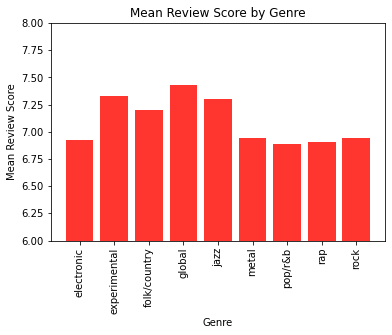

In [54]:
pl.bar(x=mean_genre_scores.index, height=mean_genre_scores, color=p4k_red)
pl.xticks(rotation=90)
pl.title('Mean Review Score by Genre')
pl.xlabel('Genre')
pl.ylabel('Mean Review Score')
pl.ylim(6, 8);

## Reviews Over Time

How did the average review score change over the years?
It appears that there was a slight increase in review scores over the years, but there only exists a very weak correlation between published date and score ( r=0.0463 ).

In [55]:
# Resample the time series by every 6 months
reviews['pub_date'] = pd.to_datetime(reviews['pub_date'])
reviews_by_pub = reviews.set_index(['pub_date'])
means_by_year = reviews_by_pub['score'].resample('6M').mean()

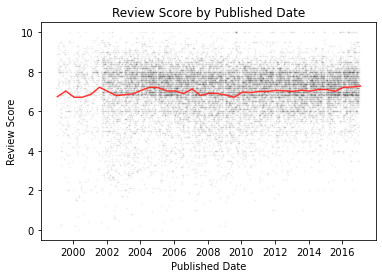

In [56]:
pl.scatter(x=reviews_by_pub.index, y=reviews_by_pub['score'], alpha=0.04, s=1, color='black');
pl.title('Review Score by Published Date')
pl.xlabel('Published Date')
pl.ylabel('Review Score')

pl.plot(means_by_year, linewidth=1.5, color=p4k_red);